In [143]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as st
import statsmodels.api as sm
from matplotlib import rcParams
from matplotlib.pyplot import matshow
#import seaborn as sns

## Loading the data and preparing the DataFrame from the csv file

In [144]:
data_frame = pd.read_csv('framingham.csv')
df = pd.DataFrame(data_frame)
df_pre=pd.DataFrame(data_frame)
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [145]:
df.isnull()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4236,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4237,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4238,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [146]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [5]:
df.sum()

male                 1820.00
age                210220.00
education            8185.00
currentSmoker        2095.00
cigsPerDay          37924.00
BPMeds                124.00
prevalentStroke        25.00
prevalentHyp         1317.00
diabetes              109.00
totChol            991771.00
sysBP              561183.50
diaBP              351486.50
BMI                108905.18
heartRate          321651.00
glucose            315724.00
TenYearCHD            644.00
dtype: float64

In [147]:
df.drop(['education'], axis = 1, inplace = True) 

In [7]:
df.size

63600

In [8]:
df.shape

(4240, 15)

In [9]:
df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [10]:
df.isnull().sum()


male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

0    3596
1     644
Name: TenYearCHD, dtype: int64


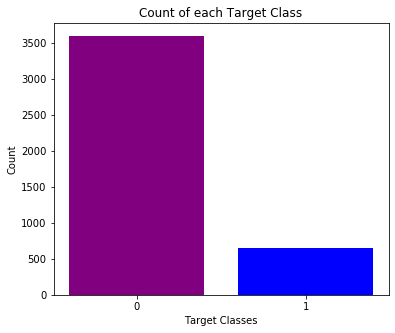

In [20]:
rcParams['figure.figsize'] = 6,5
plt.bar(df.TenYearCHD.unique(), df.TenYearCHD.value_counts(), color = ['purple', 'blue'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')
print(df.TenYearCHD.value_counts())

<b> A total of 4240 data with 15 columns, 644 observations to be risked to heart disease, and 388 data are missing or invalid. </b>  

## Data Preparation

 <b> Dropping the missing data </b>
    

0    3179
1     572
Name: TenYearCHD, dtype: int64


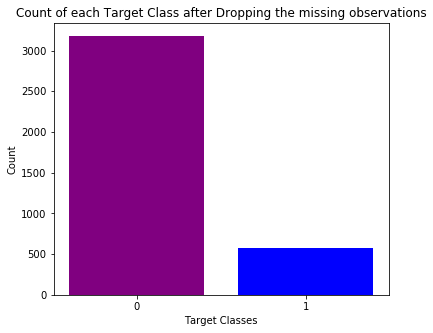

In [22]:
df_test=df
df_test.dropna(axis=0,inplace=True)
df_test.shape

rcParams['figure.figsize'] = 6,5
plt.bar(df_test.TenYearCHD.unique(), df_test.TenYearCHD.value_counts(), color = ['purple', 'blue'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class after Dropping the missing observations')
print(df_test.TenYearCHD.value_counts())





Dropping so many observations in this case might cause irrelevance in the training the model. So we <b> impute </b> the data.

## Imputation and Scaling using Pipeline

In [76]:
data_frame = pd.read_csv('framingham.csv')
df = pd.DataFrame(data_frame)
df.drop(['education'], axis = 1, inplace = True) 

In [77]:
df.shape

(4240, 15)

In [78]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [79]:
cols=["male","age","currentSmoker","cigsPerDay","BPMeds","prevalentStroke","prevalentHyp","diabetes","totChol","sysBP","diaBP","BMI","heartRate","glucose"]

In [80]:
X_components=df.columns[:-1]
ddf=df[X_components]
ddf

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0
4236,0,44,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN
4237,0,52,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0
4238,1,40,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0


In [81]:
pipe1=Pipeline([("imputer",SimpleImputer(strategy="mean")),("scaler",StandardScaler())])
df1=pipe1.fit_transform(ddf)
df_mean=pd.DataFrame(data=df1[0:,0:],  columns=cols)

pipe2=Pipeline([("imputer",SimpleImputer(strategy="median")),("scaler",StandardScaler())])
df2=pipe1.fit_transform(ddf)
df_median=pd.DataFrame(data=df2[0:,0:],  columns=cols)

pipe3=Pipeline([("imputer",SimpleImputer(strategy="most_frequent")),("scaler",StandardScaler())])
df3=pipe1.fit_transform(ddf)
df_most=pd.DataFrame(data=df3[0:,0:],  columns=cols)

#imp1=SimpleImputer(strategy="mean")
#imp2=SimpleImputer(strategy="median")
#imp3=SimpleImputer(strategy="most_frequent")

In [82]:
df_mean.shape


(4240, 14)

In [83]:
df_mean


,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1.153113,-1.234283,-0.988276,-0.758062,-1.758000e-01,-0.077014,-0.671241,-0.162437,-0.940825,-1.196267,-1.083027,0.287258,0.342775,-2.174271e-01
1,-0.867217,-0.417664,-0.988276,-0.758062,-1.758000e-01,-0.077014,-0.671241,-0.162437,0.300085,-0.515399,-0.159355,0.719668,1.590435,-2.612309e-01
2,1.153113,-0.184345,1.011863,0.925410,-1.758000e-01,-0.077014,-0.671241,-0.162437,0.187275,-0.220356,-0.243325,-0.113213,-0.073111,-5.240539e-01
3,-0.867217,1.332233,1.011863,1.767146,-1.758000e-01,-0.077014,1.489778,-0.162437,-0.263965,0.800946,1.016227,0.682815,-0.904884,9.214724e-01
4,-0.867217,-0.417664,1.011863,1.177931,-1.758000e-01,-0.077014,-0.671241,-0.162437,1.089756,-0.106878,0.092555,-0.663554,0.758662,1.330035e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,-0.867217,-0.184345,1.011863,0.925410,2.059493e-17,-0.077014,-0.671241,-0.162437,0.254961,-0.061487,-0.915087,-0.933810,0.675484,1.768073e-01
4236,-0.867217,-0.650984,1.011863,0.504542,-1.758000e-01,-0.077014,-0.671241,-0.162437,-0.602395,-0.265747,0.344466,-1.631564,0.841839,-6.224898e-16
4237,-0.867217,0.282295,-0.988276,-0.758062,-1.758000e-01,-0.077014,-0.671241,-0.162437,0.728764,0.051991,0.008585,-1.064025,0.342775,1.096688e+00
4238,1.153113,-1.117623,-0.988276,-0.758062,-1.758000e-01,-0.077014,1.489778,-0.162437,-1.166445,0.392425,1.268138,-0.049334,-0.738530,-4.364462e-01


<b> This is the preprocessed data </b>

## Exploratory Analysis

## Histogram

In [84]:
from ipywidgets import widgets

feature_desc={'age':'Age of person',
              'cigsPerDay':'No of average ciggarete taken per day',
              'BPMeds':'BPMeds',
              'prevalentStroke':'prevalentStroke',
              'prevalentHype':'prevalentHype',
             'diabetes':'diabetes',
             'totChol':'Total Cholesterol Value Measured',
             'sysBP':'sysBP',
             'diaBP':'diaBP',
             'BMI':'Body Mass Index',
             'heartRate':'Heart Rate',
             'glucose':'Glucose',
             'TenYearCHD':'Ten Year CHD'}

def hist_feature(column):
    df_mean[column].hist(bins=20,facecolor='midnightblue')
    plt.show()
   


dropdown_menu={v:k for k,v in feature_desc.items()}

widgets.interact(hist_feature, column=dropdown_menu)

interactive(children=(Dropdown(description='column', options={'Age of person': 'age', 'No of average ciggarete…

<function __main__.hist_feature(column)>

## Correlation Matrix Visualization

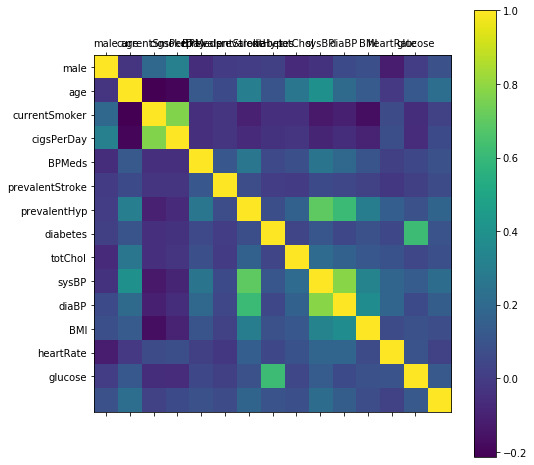

In [85]:
from matplotlib import rcParams
from matplotlib.pyplot import matshow

rcParams['figure.figsize'] = 3,8
plt.matshow(df.corr())
plt.yticks(np.arange(df_mean.shape[1]), df.columns)
plt.xticks(np.arange(df_mean.shape[1]), df.columns)
plt.colorbar()

Text(0.5, 1.0, 'Count of each Target Class')

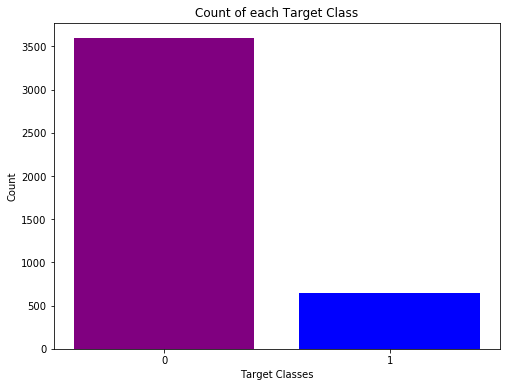

In [13]:
rcParams['figure.figsize'] = 8,6
plt.bar(df.TenYearCHD.unique(), df.TenYearCHD.value_counts(), color = ['purple', 'blue'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

In [86]:
df_mean.describe()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,4.240000e+03,4.240000e+03,4.240000e+03,4.240000e+03,4.240000e+03,4.240000e+03,4.240000e+03,4.240000e+03,4.240000e+03,4.240000e+03,4.240000e+03,4.240000e+03,4.240000e+03,4.240000e+03
mean,-1.206582e-16,1.256856e-16,-1.005485e-17,-8.714203e-17,2.346132e-17,-6.703233e-18,6.032910e-17,1.340647e-17,-6.284281e-18,-3.854359e-17,3.351617e-18,-3.770569e-16,-3.217552e-16,-3.921392e-16
std,1.000118e+00,1.000118e+00,1.000118e+00,1.000118e+00,1.000118e+00,1.000118e+00,1.000118e+00,1.000118e+00,1.000118e+00,1.000118e+00,1.000118e+00,1.000118e+00,1.000118e+00,1.000118e+00
min,-8.672175e-01,-2.050902e+00,-9.882763e-01,-7.580622e-01,-1.758000e-01,-7.701427e-02,-6.712410e-01,-1.624373e-01,-2.926282e+00,-2.217569e+00,-2.930371e+00,-2.520953e+00,-2.651607e+00,-1.838169e+00
25%,-8.672175e-01,-8.843035e-01,-9.882763e-01,-7.580622e-01,-1.758000e-01,-7.701427e-02,-6.712410e-01,-1.624373e-01,-6.926429e-01,-6.969637e-01,-6.631763e-01,-6.690817e-01,-6.553523e-01,-4.364462e-01
50%,-8.672175e-01,-6.768471e-02,-9.882763e-01,-7.580622e-01,-1.758000e-01,-7.701427e-02,-6.712410e-01,-1.624373e-01,-6.090666e-02,-1.976605e-01,-7.538502e-02,-9.601497e-02,-7.311125e-02,-8.601561e-02
75%,1.153113e+00,7.489341e-01,1.011863e+00,9.254100e-01,-1.758000e-01,-7.701427e-02,1.489778e+00,-1.624373e-01,5.708296e-01,5.285987e-01,5.963764e-01,5.483012e-01,5.923071e-01,1.330035e-01
max,1.153113e+00,2.382172e+00,1.011863e+00,5.134090e+00,5.760286e+00,1.298461e+01,1.489778e+00,6.156223e+00,1.036274e+01,7.382670e+00,5.004811e+00,7.616124e+00,5.582945e+00,1.366839e+01


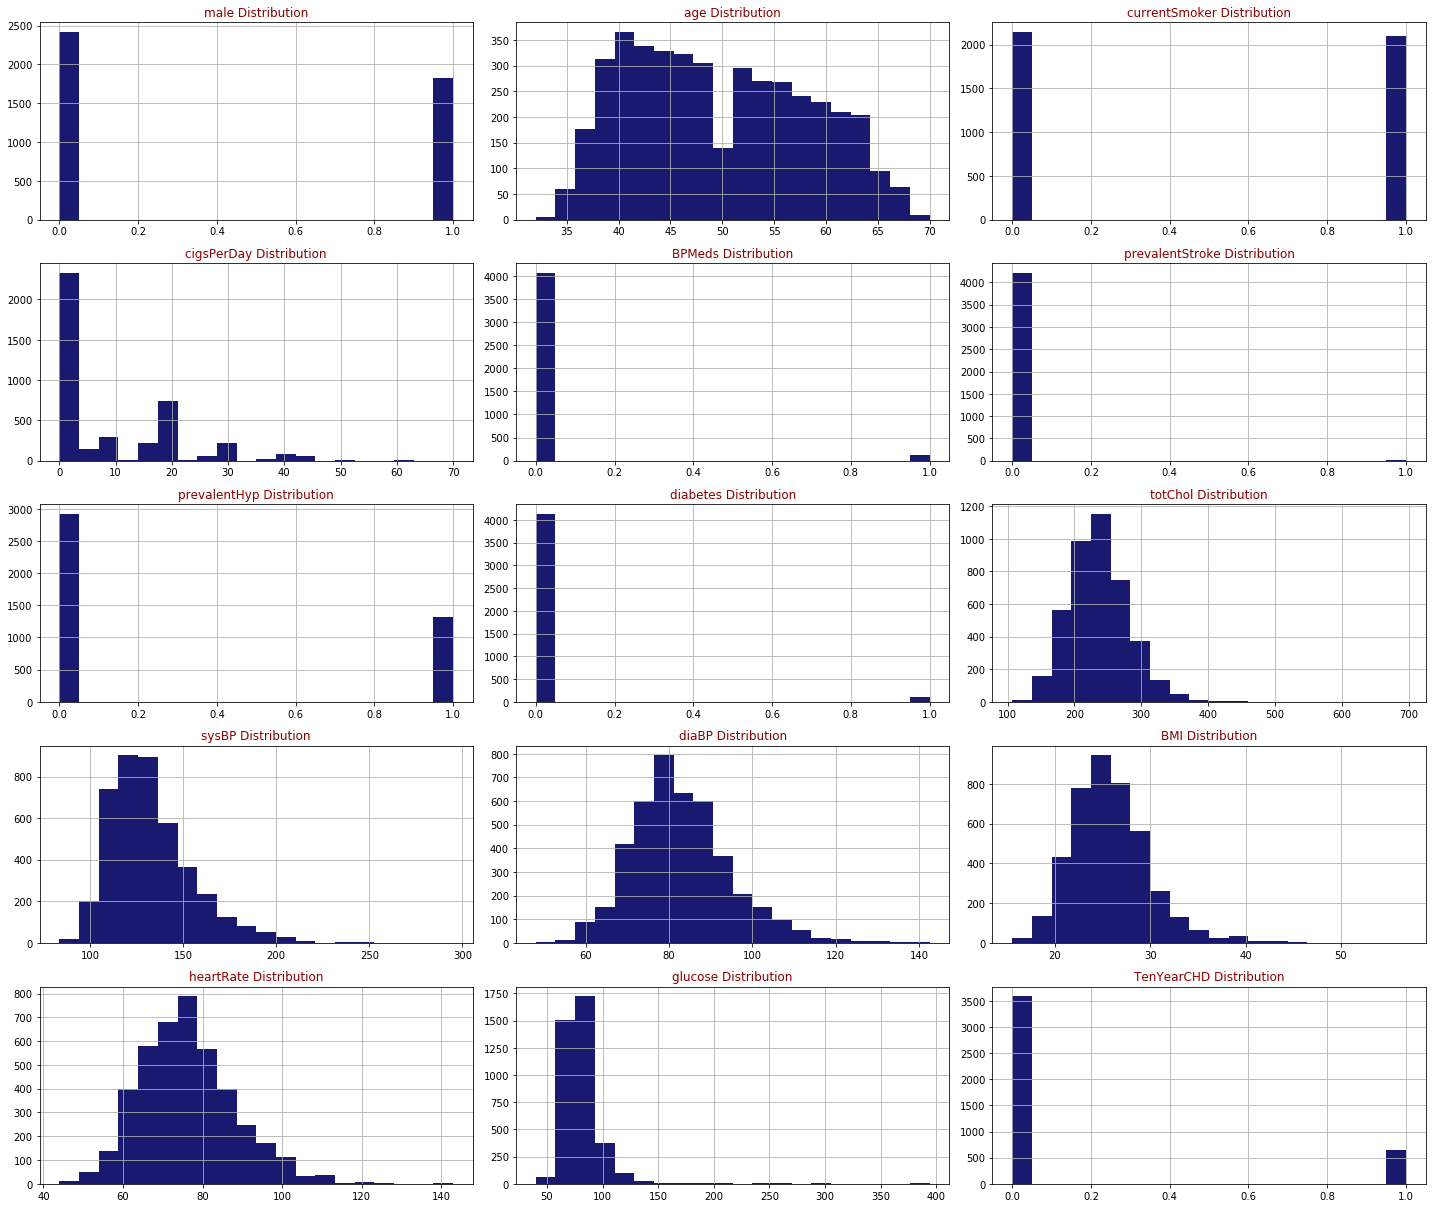

In [87]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(df,df.columns,6,3)

In [42]:
from ipywidgets import widgets

feature_desc={'age':'Age of person',
              'cigsPerDay':'No of average ciggarete taken per day',
              'BPMeds':'BPMeds',
              'prevalentStroke':'prevalentStroke',
              'prevalentHype':'prevalentHype',
             'diabetes':'diabetes',
             'totalChol':'Total Cholesterol Value Measured',
             'sysBP':'sysBP',
             'diaBP':'diaBP',
             'BMI':'Body Mass Index',
             'heartRate':'Heart Rate',
             'glucose':'Glucose'}

def plot_feature(column):
    plt.plot(df[column],df['TenYearCHD'],'.')
    plt.xlabel(feature_desc[column])
    plt.ylabel('Ten year CHD')


dropdown_menu={v:k for k,v in feature_desc.items()}

widgets.interact(plot_feature, column=dropdown_menu)

interactive(children=(Dropdown(description='column', options={'Age of person': 'age', 'No of average ciggarete…

<function __main__.plot_feature(column)>

## Feature Selection

## 1.Backward elemination (P-value approach)

In [148]:
X1_components=df_mean.columns
X1=df_mean[X1_components]
y1=df.TenYearCHD

X2_components=df_median.columns
X2=df_median[X2_components]
y2=df.TenYearCHD





In [149]:
X1.shape


(4240, 14)

In [150]:
#model1=sm.Logit(y1,X1)
#model2=sm.Logit(y2,X2)
#model3=sm.Logit(y3,X3)

#result1=model1.fit()
#result2=model2.fit()
#result3=model3.fit()

#p1 = result1.pvalues
#p2 = result2.pvalues
#p3 = result3.pvalues

#v1 = round(p1,3).nlargest(1)
#v2 = round(p2,3).nlargest(1)
#v3 = round(p3,3).nlargest(1)
#v1,v2,v3

In [151]:
coulmn_list=['male','age','currentSmoker','cigsPerDay' ,'BPMeds','prevalentStroke','prevalentHyp' ,'diabetes',  'totChol', 'sysBP',  'diaBP', 'BMI','heartRate',  'glucose']

In [152]:
df_mean.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
dtype: int64

In [153]:
coulmn_list=['male','age','currentSmoker','cigsPerDay' ,'BPMeds','prevalentStroke','prevalentHyp' ,'diabetes',  'totChol', 'sysBP',  'diaBP', 'BMI','heartRate',  'glucose']
def feature_selection(data_frame, dependent_variable, column_list):
    while len(column_list)>0:
        model = sm.Logit(dependent_variable, data_frame[column_list])
        result = model.fit(disp = 0)
        largest_pvalue = round(result.pvalues, 3).nlargest(1)
        if largest_pvalue[0] < (0.05):
            return result
            break
        else:
            column_list = column_list.drop(largest_pvalue.index)

cols=df_mean.columns[:-1]
#print(df_mean.shape)
#print(y1.shape)
result1 = feature_selection(df_mean, y1, cols)
print("This is the result using the imputation for mean values")
result1.summary()


This is the result using the imputation for mean values


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 4240
Model:                          Logit   Df Residuals:                     4234
Method:                           MLE   Df Model:                            5
Date:                Mon, 09 Mar 2020   Pseudo R-squ.:                 -0.5700
Time:                        09:20:14   Log-Likelihood:                -2835.5
converged:                       True   LL-Null:                       -1806.1
Covariance Type:            nonrobust   LLR p-value:                     1.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
male                0.1053      0.033      3.178      0.001       0.040       0.170
age                 0.2626      0.035      7.505      0.000       0.194       0.331
cigsPerDay          0.1294      0.034      3.812      0.000       0.063       0.196
prevalentStroke     0.0813      0.038      2.124      0.034       0.006       0.156
diabetes            0.1055      0.035      3.046      0.002       0.038       0.173
sysBP               0.2244      0.035      6.370      0.000       0.155       0.293
===================================================================================
"""

In [154]:
column_list=["male","age","cigsPerDay","prevalentStroke","diabetes","sysBP"]
new=df_mean[column_list]

In [155]:
new

,male,age,cigsPerDay,prevalentStroke,diabetes,sysBP
0,1.153113,-1.234283,-0.758062,-0.077014,-0.162437,-1.196267
1,-0.867217,-0.417664,-0.758062,-0.077014,-0.162437,-0.515399
2,1.153113,-0.184345,0.925410,-0.077014,-0.162437,-0.220356
3,-0.867217,1.332233,1.767146,-0.077014,-0.162437,0.800946
4,-0.867217,-0.417664,1.177931,-0.077014,-0.162437,-0.106878
...,...,...,...,...,...,...
4235,-0.867217,-0.184345,0.925410,-0.077014,-0.162437,-0.061487
4236,-0.867217,-0.650984,0.504542,-0.077014,-0.162437,-0.265747
4237,-0.867217,0.282295,-0.758062,-0.077014,-0.162437,0.051991
4238,1.153113,-1.117623,-0.758062,-0.077014,-0.162437,0.392425


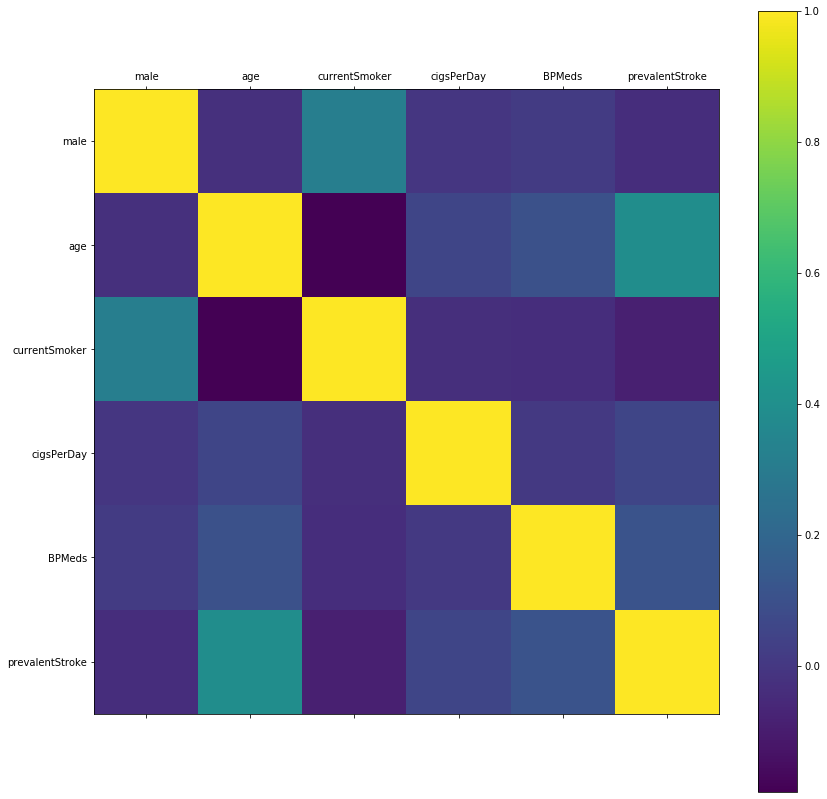

In [156]:
from matplotlib import rcParams
from matplotlib.pyplot import matshow

column_list=["male","age","cigsPerDay","prevalentStroke","diabetes","sysBP"]
new=df_mean[column_list]

rcParams['figure.figsize'] = 20, 14
plt.matshow(new.corr())
plt.yticks(np.arange(new.shape[1]), df.columns)
plt.xticks(np.arange(new.shape[1]), df.columns)
plt.colorbar()

In [157]:
result2 = feature_selection(df_median, y2, cols)
print("This is the result using the imputation for median values")
result2.summary()


This is the result using the imputation for median values


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 4240
Model:                          Logit   Df Residuals:                     4234
Method:                           MLE   Df Model:                            5
Date:                Mon, 09 Mar 2020   Pseudo R-squ.:                 -0.5700
Time:                        09:20:16   Log-Likelihood:                -2835.5
converged:                       True   LL-Null:                       -1806.1
Covariance Type:            nonrobust   LLR p-value:                     1.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
male                0.1053      0.033      3.178      0.001       0.040       0.170
age                 0.2626      0.035      7.505      0.000       0.194       0.331
cigsPerDay          0.1294      0.034      3.812      0.000       0.063       0.196
prevalentStroke     0.0813      0.038      2.124      0.034       0.006       0.156
diabetes            0.1055      0.035      3.046      0.002       0.038       0.173
sysBP               0.2244      0.035      6.370      0.000       0.155       0.293
===================================================================================
"""

## Without KFold

In [167]:
column_list=["male","age","cigsPerDay","prevalentStroke","diabetes","sysBP"]
X=df_mean[column_list]
y=df.TenYearCHD

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

X_train,X_test,y_train,y_test=train_test_split(*shuffle(X,y), test_size=0.2, random_state=5)
log_model=LogisticRegression()
log_model.fit(X_train,y_train)



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [168]:
log_model.score(X_train,y_train)

0.8581957547169812

In [169]:
log_model.score(X_test,y_test)

0.8290094339622641

In [170]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [171]:

results=confusion_matrix(y,log_model.predict(X))
results

array([[3569,   27],
       [ 599,   45]], dtype=int64)

In [172]:
classification_report(y_train, log_model.predict(X_train))

'              precision    recall  f1-score   support\n\n           0       0.86      0.99      0.92      2889\n           1       0.69      0.08      0.14       503\n\n    accuracy                           0.86      3392\n   macro avg       0.78      0.54      0.53      3392\nweighted avg       0.84      0.86      0.81      3392\n'

In [173]:
classification_report(y_test, log_model.predict(X_test))

'              precision    recall  f1-score   support\n\n           0       0.84      0.99      0.91       707\n           1       0.36      0.04      0.06       141\n\n    accuracy                           0.83       848\n   macro avg       0.60      0.51      0.49       848\nweighted avg       0.76      0.83      0.77       848\n'


# Feature Selection using Recursive Feature Elimination with Cross Validation

In [174]:
df_mean.columns

Index(['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose'],
      dtype='object')

In [175]:

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE, RFECV, SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split

rfc = RandomForestClassifier()
rfecv = RFECV(estimator = rfc, step = 1, cv = StratifiedKFold(10), scoring = 'r2',verbose=1)
X_components=df_mean.columns
X=df_mean[X_components]
y=df.TenYearCHD
print(X.shape)
print(y.shape)

rfecv.fit(X, y)


(4240, 14)
(4240,)
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 14 features.
Fitting estimator with 13

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nodes=None, max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_score=False, random_state=None,
                                       verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='r2', step=1, verbose=1)

In [180]:
X_components=df_mean.columns
X=df[X_components]
X

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0
4236,0,44,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN
4237,0,52,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0
4238,1,40,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0


In [179]:
X.columns

ValueError: Length of values does not match length of index

In [182]:
X_components=df_mean.columns
X=df[X_components]
dset = df
print(dset.shape)
print(X)
dset['attr'] = X.columns
dset['importance'] = rfecv.estimator_.feature_importances_

dset = dset.sort_values(by='importance', ascending=False)


plt.figure(figsize=(16, 14))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

ValueError: Length of values does not match length of index

In [191]:
print(np.where(rfecv_scaled.support_ == False)[0])

[]


In [141]:
rfecv_unscaled = RFECV(estimator = rfc, step = 1, cv = StratifiedKFold(10), scoring = 'accuracy',verbose=1)
X_components=df_pre.columns
X_unscaled=df_pre[X_components]
y_unscaled=df_pre.TenYearCHD


rfecv_unscaled.fit(X_unscaled, y_unscaled)


Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fittin

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nodes=None, max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_score=False, random_state=101,
                                       verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=1)

In [193]:
X_components=df_mean.columns
X=df_mean[X_components]
rfecv_array = [True, True, False,True,False,False,True,False,True,True,True,True,True,True]
res = [i for i, val in enumerate(rfecv_array) if not val]
X.drop(X.columns[res], axis=1, inplace=True)

In [194]:
X_train,X_test,y_train,y_test=train_test_split(*shuffle(X,y), test_size=0.2, random_state=5)
log_model=LogisticRegression()
log_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [195]:
log_model.score(X_train,y_train)

0.8540683962264151

In [196]:
log_model.score(X_test,y_test)

0.8584905660377359

## Dropping Data

In [74]:
#x= df.loc[:,"TenYearCHD"]
#y = df.loc[:,"heartRate" ]

In [77]:
from statsmodels.tools import add_constant

In [ ]:
statsmodels.tools?


In [ ]:
statsmodels.addconstant?

In [78]:
from statsmodels.tools import add_constant as add_constant
df_constant = add_constant(df)
df_constant.head()

,const,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,1.0,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1.0,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,1.0,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,1.0,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


## Why adding a constant column?


It’s because you expect your dependent variable to take a nonzero value when all the otherwise included regressors are set to zero.

Suppose you want to model the wage as a function of years of secondary schooling (in years). You’d estimate an equation of the form

yi=α+xiβ+εi

because one can reasonably expect the wage to take, on average, a positive value even if one’s secondary schooling is null. This value would show up as a constant.

Note however that a constant may take an absurd value while being relevant for the estimation, or may be irrelevant altogether. Suppose further you’re interested in estimating the model above with variables as deviations from their mean.

yi−y¯=(α−α¯)+(xi−x¯)β~+νi

Obviously, the constant equals its average value so that the first term on the right-hand side cancels out. You end up with

yi−y¯=(xi−x¯)β~+νi

that is a model without constant. In practice, including one would probably not be of any concern (for a reasonable amount of observations), but would be theoretically injustified.

Remember that you should always know whether what you estimate makes sense, both from a real and statistical point of view!



In [79]:
 from sklearn.linear_model import LogisticRegression

In [80]:
df_constant.TenYearCHD

0       0
1       0
2       0
3       1
4       0
       ..
4233    1
4234    0
4237    0
4238    0
4239    0
Name: TenYearCHD, Length: 3751, dtype: int64

In [81]:
X_components=df_constant.columns[:-1]
X=df_constant[X_components]

y=df_constant.TenYearCHD

In [82]:
X_components

Index(['const', 'male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose'],
      dtype='object')

In [83]:
X

,const,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1.0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,1.0,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1.0,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,1.0,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,1.0,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1.0,1,50,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0
4234,1.0,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0
4237,1.0,0,52,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0
4238,1.0,1,40,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0


In [84]:
y

0       0
1       0
2       0
3       1
4       0
       ..
4233    1
4234    0
4237    0
4238    0
4239    0
Name: TenYearCHD, Length: 3751, dtype: int64

In [85]:
test_train= LogisticRegression(random_state=0)

In [86]:
test_train.fit(X,y)

c:\users\nirusha manandhar\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [87]:
test_train.predict(X)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [88]:
test_train.score(X,y)

0.8499066915489203

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
X_train,X_test,y_train,y_test=train_test_split(*shuffle(X,y), test_size=0.2, random_state=5)
model=LogisticRegression()
model.fit(X_train,y_train)


In [110]:
X_train,X_test,y_train,y_test=train_test_split(*shuffle(X,y), test_size=0.2, random_state=5)

In [111]:
model=LogisticRegression()

In [112]:
model.fit(X_train,y_train)

c:\users\nirusha manandhar\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [117]:
y_pred=model.predict(X_test)

In [114]:
model.score(X_test,y_test)

0.8468708388814914

In [115]:
model.score(X_train,y_train)

0.851

In [106]:
X_train.shape

(3375, 15)

In [108]:
X_test.shape

(376, 15)

In [121]:
from sklearn.metrics import accuracy_score

In [123]:
accuracy_score(y_test,y_pred)

0.8468708388814914

In [124]:
test_train.coef_

array([[-1.12628407e+00,  1.39711462e-01,  3.32410574e-02,
        -1.86148896e-01,  2.32450639e-02,  2.97070401e-01,
         1.67671406e-01,  8.16284334e-01,  3.91536063e-01,
        -6.46218025e-04,  1.04587049e-02, -1.03365491e-02,
        -4.10556533e-02, -1.82155013e-02,  4.70942724e-03]])

In [125]:
test_train.intercept_

array([-1.14232387])

## Using K-fold for cross validation

## Confusion Matrix

In [138]:
LogisticRegression?

In [139]:
lamda?

Object `lamda` not found.


In [120]:
from sklearn.metrics import confusion_matrix